**import libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import PIL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

**define image properties**

In [2]:
base_dir = r"C:\Users\se\OneDrive\Desktop\dogs"

img_height,img_width=(200,200)
batch_size = 3

train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

**training and validation generator**

In [3]:
train = tf.keras.preprocessing.image_dataset_from_directory(base_dir,
                                                            subset="training",
                                                            seed=123,
                                                            validation_split=0.2,
                                                            image_size=(img_height,img_width),
                                                            batch_size=batch_size)

validation = tf.keras.preprocessing.image_dataset_from_directory(base_dir, 
                                                                 subset="validation",
                                                                 seed=123,
                                                                 validation_split=0.2,
                                                                 image_size=(img_height,img_width),
                                                                 batch_size=batch_size)

Found 50 files belonging to 5 classes.
Using 40 files for training.
Found 50 files belonging to 5 classes.
Using 10 files for validation.


In [4]:
class_names = train.class_names
print(class_names)

['german shepherd & stray cross', 'german shepherd cross', 'husky', 'yorkshire & skye terrier', 'yorkshire, skye terrier & shitzu']


**create neural net model**

In [5]:
model = Sequential()

model.add(tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512,activation='relu'))

model.add(tf.keras.layers.Dense(1,activation='softmax'))

**analyse the model**

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

**compile the model**

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
            loss='categorical_crossentropy',metrics=['accuracy'])

**fit the model**

In [8]:
model.fit(train,epochs=10,validation_data=validation)

Epoch 1/10
14/14 [==============================] - 2s 137ms/step - loss: 0.0000e+00 - accuracy: 0.2000 - val_loss: 0.0000e+00 - val_accuracy: 0.2000
Epoch 2/10
14/14 [==============================] - 2s 130ms/step - loss: 0.0000e+00 - accuracy: 0.2000 - val_loss: 0.0000e+00 - val_accuracy: 0.2000
Epoch 3/10
14/14 [==============================] - 2s 132ms/step - loss: 0.0000e+00 - accuracy: 0.2000 - val_loss: 0.0000e+00 - val_accuracy: 0.2000
Epoch 4/10
14/14 [==============================] - 2s 131ms/step - loss: 0.0000e+00 - accuracy: 0.2000 - val_loss: 0.0000e+00 - val_accuracy: 0.2000
Epoch 5/10
14/14 [==============================] - 2s 129ms/step - loss: 0.0000e+00 - accuracy: 0.2000 - val_loss: 0.0000e+00 - val_accuracy: 0.2000
Epoch 6/10
14/14 [==============================] - 2s 131ms/step - loss: 0.0000e+00 - accuracy: 0.2000 - val_loss: 0.0000e+00 - val_accuracy: 0.2000
Epoch 7/10
14/14 [==============================] - 2s 128ms/step - loss: 0.0000e+00 - accuracy: 0.2

In [23]:
score = model.evaluate(train)
print('Train accuracy:', score[1])

14/14 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 0.2000
Train accuracy: 0.20000000298023224


**visualize the results**

In [10]:
for images, class_name in train.take(1):
    print(images.shape)
    print(class_name.numpy())

(3, 200, 200, 3)
[2 2 3]


actual label: german shepherd & stray cross
1/1 [==============================] - 0s 27ms/step
predicted label: german shepherd & stray cross


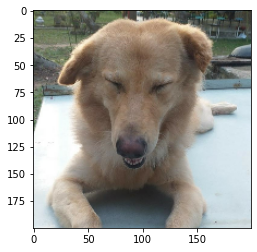

In [22]:
for images, class_name in train.take(1):
    
    image = images[0].numpy().astype('uint8')
    label = class_name[0].numpy()
    
    plt.imshow(image)
    print("actual label:",class_names[label])
    
    model_prediction = model.predict(images)
    print("predicted label:",class_names[np.argmax(model_prediction[0])])